In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon
plt.style.use('seaborn-whitegrid')
import pandas as pd
from collections import defaultdict
from scipy.stats import entropy
from scipy.spatial.distance import cosine, euclidean
from numpy.linalg import norm
import seaborn as sns
import numpy as np
sns.set()


In [2]:
df_all = pd.read_csv('output_data/stm/topic_distr_jisc_10.csv', index_col=0)
df_all.columns

Index(['index', 'desription', 'labels', 'years', 'len', 'X1', 'X2', 'X3', 'X4',
       'X5', 'X6', 'X7', 'X8', 'X9', 'X10'],
      dtype='object')

In [3]:
df_mitchell = pd.read_csv('output_data/MPD_export_1846_1920_JISC_ref.csv', index_col=0)


In [4]:

df_mitchell[df_mitchell['id']=='MPD_1878_1160']

,index,id,S-TITLE,S-POL,CATEGORY,DISTRICT,DISTRICT_PUB,COUNTY,S-PRICE,D-EST,D-PUB,E-LOC,E-ORG,E-PER,S-TITLE-ALT,TEXT,DISTRICT_DESCRIPTION,year,chain_id,JISC
13584,1160,MPD_1878_1160,STALYBRIDGE REPORTER .,liberal,provincial,salford . — ( lancashire . ),salford,lancashire,1 ½ d,1866,Saturday,Stalybridge<SEP>Ashton-under-Lyne<SEP>Dukinfie...,Hobson and Andrew,NaN,NaN,"STALYBRIDGE REPORTER . Saturday , 1 ½ d . Libe...","Contains a population of over 30 , 000 , and i...",1878,CID_002734,0


In [5]:
pd.options.display.max_colwidth = 1000
df_all.sort_values('X6', ascending=False)[:30]

,index,desription,labels,years,len,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
22267,MPD_1898_896,"and is extensively posted to Hotels in various parts of the Contains a complete local guide to Eastbourne and surround - ing neighbourhood , latest fashionable arrivals , a complete visitors' list , numerous views , time and tide tables , and useful information interesting to visitors .",independent,1898,48,0.026702,0.001841,0.069587,0.026297,0.021414,0.792072,0.003563,0.021861,0.004663,0.031999
17239,MPD_1890_815,"Contains a complete local guide to Eastbourne and surround - ing neighbourhood , latest fashionable arrivals , a visitors' list , numerous views , time and tide tables , and useful information interesting to visitors .",independent,1890,36,0.025061,0.001567,0.096168,0.010879,0.017867,0.790316,0.004221,0.016819,0.004538,0.032564
18883,MPD_1893_874,"and is extensivel yposted to Hotels in various parts of the country . Contains a complete local guide to Eastbourne and surround - ing neighbourhood , latest fashionable arrivals , a complete visitors' list , numerous views , time and tide tables , and useful information interesting to visitors .",independent,1893,50,0.026806,0.002341,0.075879,0.026365,0.021497,0.784074,0.004768,0.020614,0.005837,0.031819
4220,MPD_1865_328,"is purchased by visitors for distant circulation . Advocates the interests of the district , and during the season contains descriptions of the remarkable places in the vicinity , which render it exceedingly interesting to visitors . It is non-political ; giving the week ' s news , the arrivals and departures ; coach , omnibus , and railway time-tables ; and other useful information .",non-aligned,1865,66,0.006189,0.005214,0.123390,0.009595,0.017952,0.773253,0.019041,0.009142,0.012619,0.023605
2466,MPD_1860_274,"is purchased by visitors for distant circulation . Advocates the interests of the district , and during the season contains descriptions of the remarkable places in the vicinity , which render it exceedingly interesting to visitors . It is non-political ; giving the week ' s news , the arrivals and departures ; coach , omnibus , and railway time-tables ; and other useful information .",non-aligned,1860,66,0.006100,0.005549,0.122323,0.010068,0.017382,0.773195,0.020367,0.008526,0.014254,0.022237
11319,MPD_1880_798,"The second title of the Gazette is the Visitor ' s Vade mecum ; and with the view of appealing to the large number of visitors to this fashionable watering-place , everything of interest is garefully reported , with full lists of the company .",non-aligned,1880,45,0.010338,0.002844,0.097858,0.013265,0.022776,0.772196,0.006007,0.012260,0.008856,0.053600
13925,MPD_1885_605,"is pur - chased by visitors for distant circulation . Advocates the interests of the district , and contains descrip - tions of the remarkable places in the vicinity , which render it exceedingly interesting to visitors . It gives the week ' s local news , the arrivals and departures , coach , omnibus , and railway time-tables , and other useful information . A complete list of visitors for",liberal,1885,71,0.006521,0.003952,0.140471,0.006693,0.019185,0.758685,0.016115,0.011545,0.006852,0.029981
15641,MPD_1888_877,"The Review is an excellently arranged local paper , with full reports of all meetings , & c .",conservative,1888,19,0.023726,0.002646,0.095327,0.018845,0.031623,0.758331,0.005677,0.020670,0.007497,0.035658
24050,MPD_1900_896,"and is extensively posted to Hotels in various parts of the country . Contains a complete local guide to Eastbourne and surround - ing neighbourhood , latest fashionable arrivals , a complete visitors' list , numerous views , time and tide tables , and useful information interesting to visitors .",independent,1900,50,0.029989,0.002644,0.062767,0.050759,0.025600,0.757818,0.004227,0.026176,0.006030,0.033988
14091,MPD_1885_779,"Contains a complete local guide to Eastbourne and surround - ing neighbourhood , latest fashionable arrivals , a visitors' list ,

In [6]:
pd.options.display.max_colwidth = 100
df_all.sort_values('X3', ascending=False)

,index,desription,labels,years,len,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
24947,MPD_1900_1915,"Gives the local news of , and a well - selected digest of general intelligence .",independent,1900,16,0.027523,0.008030,0.614814,0.002325,0.034017,0.076209,0.048862,0.037904,0.010466,0.139850
24857,MPD_1900_1813,"Gives the general news of the week , and the local intelligence of Berks and Oxon .",liberal,1900,17,0.027600,0.008464,0.613528,0.002376,0.034256,0.073431,0.051244,0.038712,0.010723,0.139666
21311,MPD_1895_1690,"Gives the general news of the week , and the local intelligence of Berks and Oxon .",liberal,1895,17,0.027763,0.009473,0.611886,0.002629,0.033980,0.073893,0.056541,0.036866,0.012734,0.134234
18041,MPD_1890_1686,"Gives the local news of , and a well - selected digest of general intelligence .",non-aligned,1890,16,0.027866,0.009961,0.611487,0.002837,0.033418,0.077355,0.058959,0.034401,0.014660,0.129056
19639,MPD_1893_1707,"Gives the general news of the week , and the local intelligence of Berks and Oxon .",liberal,1893,17,0.027816,0.009888,0.611126,0.002733,0.033841,0.074087,0.058719,0.036129,0.013610,0.132051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,MPD_1847_507,has a considerable circulation in England and in the principal HAdvocates all the national inter...,liberal,1847,95,0.005085,0.457829,0.007442,0.126685,0.010975,0.001642,0.060193,0.006837,0.315446,0.007865
334,MPD_1846_492,"Advocates all the national interests ; supports free trade ; and in religion , perfect freedom a...",liberal,1846,87,0.004063,0.542804,0.007283,0.090272,0.009364,0.001319,0.071256,0.005697,0.260881,0.007062
1628,MPD_1856_703,"Advocates the interests of agriculture , commerce , and manufactures . — It strenuously urges en...",liberal,1856,110,0.002456,0.661832,0.007280,0.029241,0.007452,0.000730,0.069445,0.005147,0.209608,0.006810
7,MPD_1846_135,"the nobility , gentry , clergy , and the influential agricultural and commercial classes Aodvoca...",conservative,1846,34,0.002040,0.042120,0.007123,0.122148,0.013630,0.001402,0.017456,0.006295,0.779238,0.008547


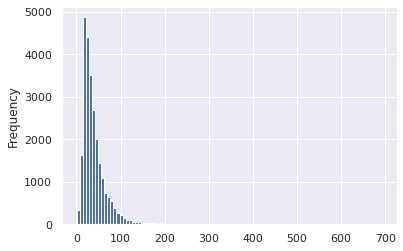

In [7]:
df_all['len'].plot(kind='hist',bins=100)

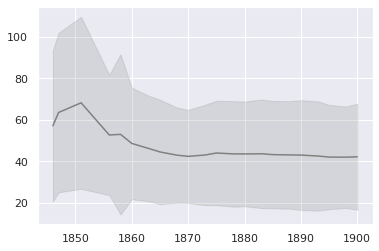

In [9]:
df = df_all[df_all['len'] >= 20]
df.reset_index(inplace=True)
df.shape
m = df.groupby('years')['len'].mean()
std = df.groupby('years')['len'].std()

plt.plot(m.index, m, '-', color='gray')

plt.fill_between(std.index, m - std, m + std,
                 color='gray', alpha=0.2)

In [10]:
#df[df.labels=='conservative'].sample(1).loc[:,'X1':].values[0]
df.loc[(df.years==1846)].sample(1).loc[:,'X1':].values[0]

array([0.05143862, 0.00593792, 0.03864199, 0.02867506, 0.00117453,
       0.00059292, 0.14164659, 0.001715  , 0.00678074, 0.00569885,
       0.00513518, 0.01058516, 0.01420517, 0.00767819, 0.00411126,
       0.03179234, 0.04410584, 0.00688162, 0.02581244, 0.00544963,
       0.01274853, 0.01619908, 0.00094482, 0.13075962, 0.0040371 ,
       0.02125436, 0.00990398, 0.0073525 , 0.00336843, 0.01319165,
       0.03047449, 0.03397224, 0.02306828, 0.00755459, 0.02126713,
       0.00537752, 0.00727464, 0.004867  , 0.00905904, 0.02400522,
       0.00970042, 0.01406371, 0.00033004, 0.06996279, 0.0180192 ,
       0.00188618, 0.00853481, 0.01132797, 0.01373903, 0.02769656])

In [11]:
#def JSD(P, Q):
#    _P = P / norm(P, ord=1)
#    _Q = Q / norm(Q, ord=1)
#    _M = 0.5 * (_P + _Q)
#    return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))

In [27]:
years = sorted(df.years.unique())
results = []#defaultdict(list)
#results_cross = defaultdict(list)

l1, l2 = 'liberal','conservative'
for year in years:
    for _ in range(100):
        r1 = df.loc[(df.labels==l1) & (df.years==year)].sample(1).loc[:,'X1':].values[0]
        r2 = df.loc[(df.labels==l2) & (df.years==year)].sample(1).loc[:,'X1':].values[0]
        r3 = df.loc[(df.labels==l1) &(df.years==year)].sample(1).loc[:,'X1':].values[0]
        results.append([year,f'{l1}_{l2}',jensenshannon(r1,r2)])
        results.append([year,f'{l1}_{l1}',jensenshannon(r1,r3)])

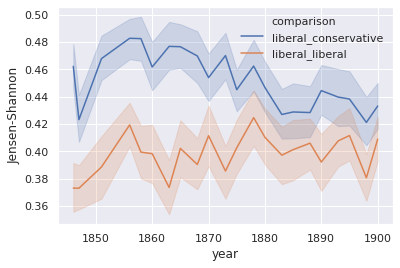

In [ ]:
#df_results = pd.DataFrame.from_dict(results).T
#df_results.head()
df_results = pd.DataFrame(results,columns=['year','comparison','Jensen-Shannon'])
fig = sns.lineplot('year','Jensen-Shannon',hue='comparison' ,data=df_results).get_figure()
fig.savefig('images/jsd_topic_{}_{}.png')
#sns.lineplot('year','ingroup', data=df_results)

In [ ]:
#summary = pd.concat([df_results.mean(axis=1),df_results.std(axis=1)], axis=1)
#summary_cross = pd.concat([df_results_cross.mean(axis=1),df_results_cross.std(axis=1)], axis=1)
#summary.columns = ['mean','std']
#summary_cross.columns = ['mean','std']

NameError: name 'pd' is not defined

In [ ]:
#summary = summary.rolling(3).mean()

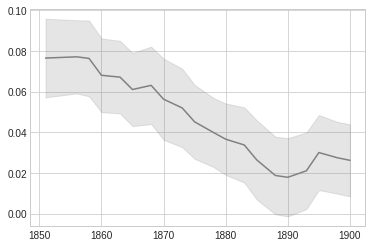

In [343]:
#plt.plot(summary.index, summary['mean'], '-', color='gray')

#plt.fill_between(summary.index, summary['mean'] - summary['std'], summary['mean'] + summary['std'],
#                 color='gray', alpha=0.2)

                 

#plt.plot(summary_intra.index, summary_intra['mean'], '-', color='green')

#plt.fill_between(summary_intra.index, summary_intra['mean'] - summary_intra['std'], summary_intra['mean'] + summary_intra['std'],
#                 color='green', alpha=0.2)

# Principal Component Analysis

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [233]:

df_all = pd.read_csv('output_data/stm/topic_distr_pol_10.csv', index_col=0)
df_all.columns

Index(['index', 'desription', 'labels', 'years', 'len', 'X1', 'X2', 'X3', 'X4',
       'X5', 'X6', 'X7', 'X8', 'X9', 'X10'],
      dtype='object')

In [250]:
targets = ['liberal', 'conservative', 'independent', 'non-aligned']
year = 1890
df_sel = df_all[(df_all.years==year) & (df_all.labels.isin(targets)) & (df_all['len'] >= 50)]
df_sel = df_sel.sample(frac=1.0)
df_sel.reset_index(inplace=True, drop=True)
df_sel = df_sel[:300]
X = df_sel.loc[:,'X1':]
X.shape

(300, 10)

In [251]:
# taken from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [252]:
pca.explained_variance_ratio_

array([0.2847586 , 0.18663121])

In [253]:
#finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

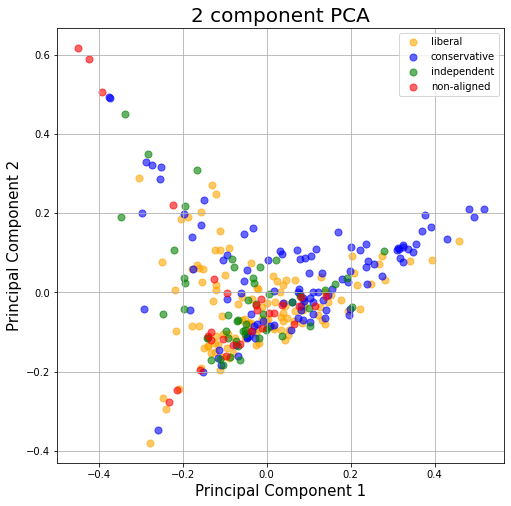

In [254]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

colors = ['orange', 'blue', 'g','r']
for target, color in zip(targets,colors):
    indicesToKeep = df_sel[df_sel.labels==target].index
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               ,principalDf.loc[indicesToKeep, 'principal component 2'],
                c = color, s = 50, alpha=.6
               )
ax.legend(targets)
ax.grid()

In [239]:
# taken from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])

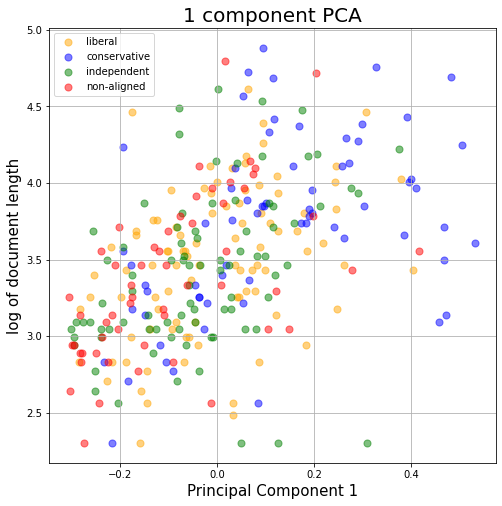

In [240]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('log of document length', fontsize = 15)
ax.set_title('1 component PCA', fontsize = 20)

colors = ['orange', 'blue', 'g','r']
for target, color in zip(targets,colors):
    indicesToKeep = df_sel[df_sel.labels==target].index
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'],
               np.log(df_sel[df_sel.labels==target]['len']),
            c = color, s = 50, alpha=.5
               )
ax.legend(targets)
ax.grid()

In [241]:
df_sel.replace({'labels':{'conservative':'b',
                        'liberal':'orange',
                        'non-aligned':'r',
                        'independent':'g'}},
                        inplace=True)

[]

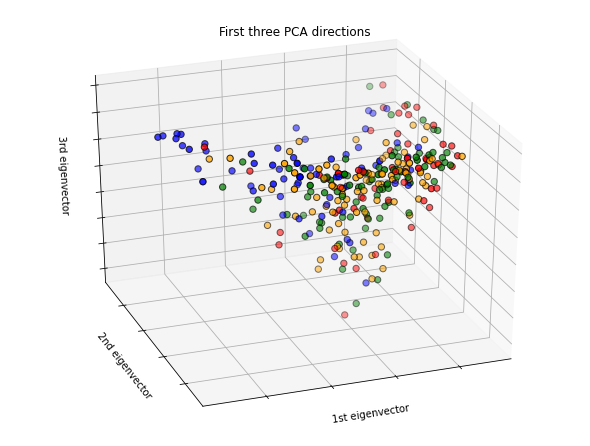

In [242]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_sel.labels,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])